In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
tf.__version__

'2.2.0'

In [4]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = 20000)

In [5]:
X_train[0][:5]

[1, 14, 22, 16, 43]

In [6]:
X_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 82

In [7]:
X_train = pad_sequences(X_train, maxlen = 100)
X_test = pad_sequences(X_test, maxlen=100)

In [8]:
X_train.shape

(25000, 100)

In [9]:
vocab_size = 20000
embed_size = 128

In [10]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Embedding

In [11]:
model = Sequential()
model.add(Embedding(vocab_size, embed_size, input_shape = (X_train.shape[1],)))
model.add(LSTM(units=60, activation='tanh'))
#model.add(Dropout(0.5))

model.add(Dense(units=1, activation='sigmoid'))
#model.add(Dropout(0.5))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 128)          2560000   
_________________________________________________________________
lstm (LSTM)                  (None, 60)                45360     
_________________________________________________________________
dense (Dense)                (None, 1)                 61        
Total params: 2,605,421
Trainable params: 2,605,421
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/5
196/196 [==============================] - 87s 444ms/step - loss: 0.4284 - accuracy: 0.7940 - val_loss: 0.3557 - val_accuracy: 0.8503
Epoch 2/5
196/196 [==============================] - 93s 475ms/step - loss: 0.2282 - accuracy: 0.9126 - val_loss: 0.3789 - val_accuracy: 0.8438
Epoch 3/5
196/196 [==============================] - 101s 515ms/step - loss: 0.1492 - accuracy: 0.9468 - val_loss: 0.4725 - val_accuracy: 0.8334
Epoch 4/5
196/196 [==============================] - 102s 522ms/step - loss: 0.0996 - accuracy: 0.9660 - val_loss: 0.5343 - val_accuracy: 0.8121
Epoch 5/5
196/196 [==============================] - 104s 533ms/step - loss: 0.0659 - accuracy: 0.9777 - val_loss: 0.6744 - val_accuracy: 0.8234


In [14]:
history.history

{'loss': [0.4283747673034668,
  0.22823423147201538,
  0.1491965502500534,
  0.09957615286111832,
  0.06592069566249847],
 'accuracy': [0.7940000295639038,
  0.9125999808311462,
  0.9467599987983704,
  0.9659600257873535,
  0.9776800274848938],
 'val_loss': [0.35573437809944153,
  0.37892553210258484,
  0.47246676683425903,
  0.5343014597892761,
  0.6744096279144287],
 'val_accuracy': [0.8503199815750122,
  0.8437600135803223,
  0.8334000110626221,
  0.8121200203895569,
  0.823360025882721]}

In [15]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

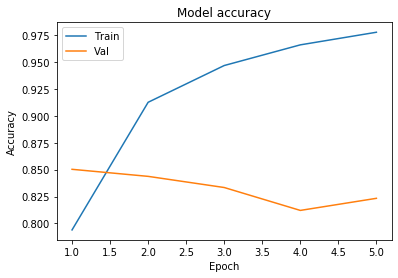

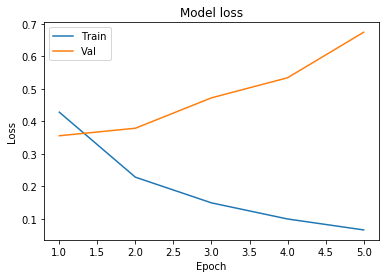

In [16]:
plot_learningCurve(history, 5)